In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

plt.rcParams['figure.figsize'] = (15, 8)

from sklearn.linear_model import LinearRegression

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [2]:
df = pd.read_csv('TS_data.txt', sep=",", header=0, index_col=['DATE'], parse_dates=True)
df.head()

,SOUID,TG,Q_TG
DATE,,,
1947-01-01,128124,-24,0
1947-01-02,128124,-35,0
1947-01-03,128124,-45,0
1947-01-04,128124,-127,0
1947-01-05,128124,-150,0


In [3]:
df.dtypes

SOUID    int64
TG       int64
Q_TG     int64
dtype: object

In [4]:
df['TG'] = df['TG']*0.1

In [5]:
df_train = df['January 1955':'December 2010'].copy() # 'January 1955'
df_test = df['Jan 2011':].copy()

In [6]:
df_train.head()

,SOUID,TG,Q_TG
DATE,,,
1955-01-01,128124,-1.9,0
1955-01-02,128124,-2.0,0
1955-01-03,128124,-2.6,0
1955-01-04,128124,-3.9,0
1955-01-05,128124,-7.1,0


In [7]:
df_train.tail()

,SOUID,TG,Q_TG
DATE,,,
2010-12-27,127932,-3.9,0
2010-12-28,127932,-6.7,0
2010-12-29,127932,-9.5,0
2010-12-30,127932,-10.2,0
2010-12-31,127932,0.3,0


In [8]:
df_test.head()

,SOUID,TG,Q_TG
DATE,,,
2011-01-01,127932,2.2,0
2011-01-02,127932,0.0,0
2011-01-03,127932,-2.5,0
2011-01-04,127932,-2.8,0
2011-01-05,127932,-7.0,0


In [9]:
df_train.shape, df_test.shape

((20454, 3), (3684, 3))

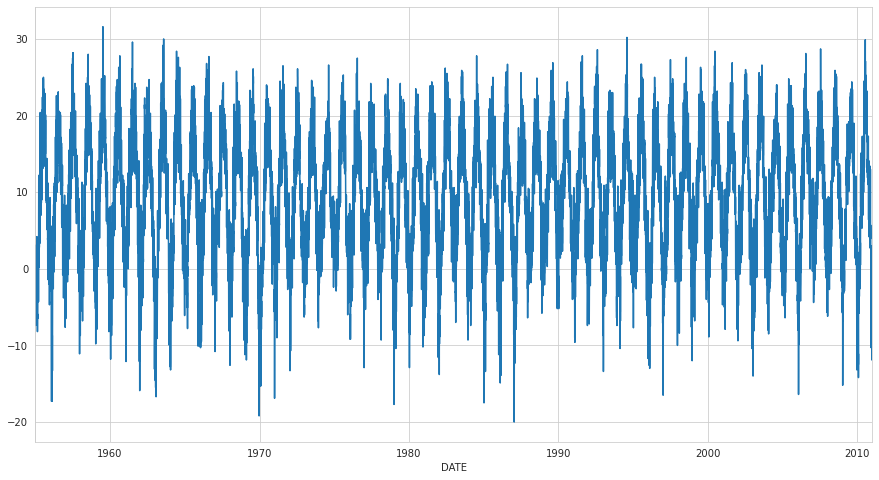

In [10]:
df_train['TG'].plot();

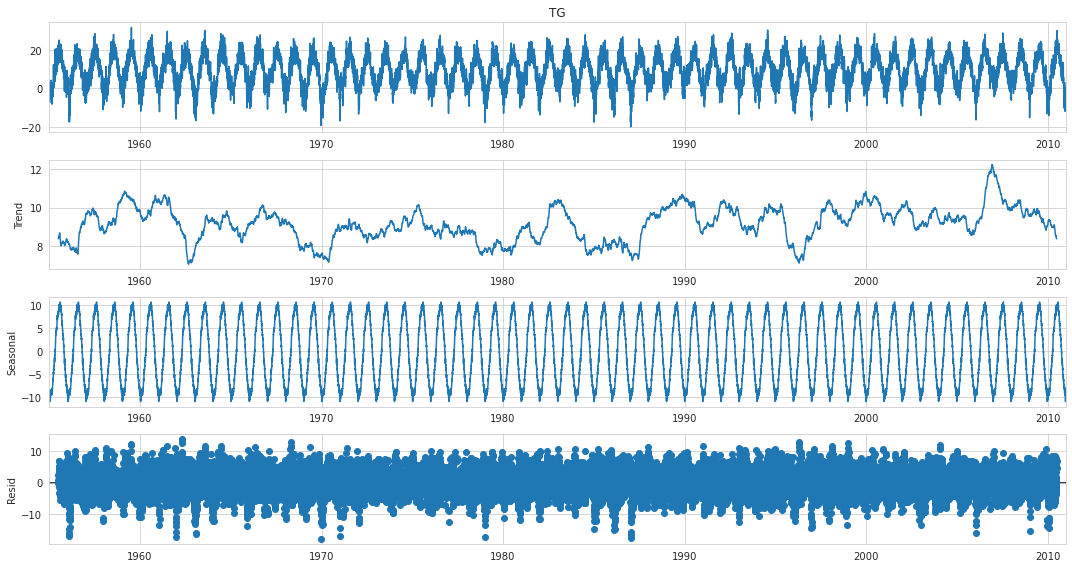

In [11]:
sd = seasonal_decompose(df_train['TG'], period = 365)
sd.plot()
None

In [12]:
df_train['month'] = df_train.index.month
df_train.head()

,SOUID,TG,Q_TG,month
DATE,,,,
1955-01-01,128124,-1.9,0,1
1955-01-02,128124,-2.0,0,1
1955-01-03,128124,-2.6,0,1
1955-01-04,128124,-3.9,0,1
1955-01-05,128124,-7.1,0,1


In [13]:
seasonal_dummies = pd.get_dummies(df_train['month'], prefix='month_')
seasonal_dummies.head()

,month__1,month__2,month__3,month__4,month__5,month__6,month__7,month__8,month__9,month__10,month__11,month__12
DATE,,,,,,,,,,,,
1955-01-01,1,0,0,0,0,0,0,0,0,0,0,0
1955-01-02,1,0,0,0,0,0,0,0,0,0,0,0
1955-01-03,1,0,0,0,0,0,0,0,0,0,0,0
1955-01-04,1,0,0,0,0,0,0,0,0,0,0,0
1955-01-05,1,0,0,0,0,0,0,0,0,0,0,0


In [14]:
df_train = df_train.join(seasonal_dummies)
df_train.head()

,SOUID,TG,Q_TG,month,month__1,month__2,month__3,month__4,month__5,month__6,month__7,month__8,month__9,month__10,month__11,month__12
DATE,,,,,,,,,,,,,,,,
1955-01-01,128124,-1.9,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1955-01-02,128124,-2.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1955-01-03,128124,-2.6,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1955-01-04,128124,-3.9,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1955-01-05,128124,-7.1,0,1,1,0,0,0,0,0,0,0,0,0,0,0


In [15]:
X = df_train.drop(['SOUID', 'Q_TG', 'month', 'TG'], axis=1)
y = df_train['TG']
X.shape, y.shape

((20454, 12), (20454,))

In [16]:
m = LinearRegression()
m.fit(X, y)
df_train['trend_and_seasonality'] = m.predict(X)
df_train.head()

,SOUID,TG,Q_TG,month,month__1,month__2,month__3,month__4,month__5,month__6,month__7,month__8,month__9,month__10,month__11,month__12,trend_and_seasonality
DATE,,,,,,,,,,,,,,,,,
1955-01-01,128124,-1.9,0,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.412598
1955-01-02,128124,-2.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.412598
1955-01-03,128124,-2.6,0,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.412598
1955-01-04,128124,-3.9,0,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.412598
1955-01-05,128124,-7.1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.412598


In [17]:
df_train['remainder'] = df_train['TG'] - df_train['trend_and_seasonality']
df_train.head()

,SOUID,TG,Q_TG,month,month__1,month__2,month__3,month__4,month__5,month__6,month__7,month__8,month__9,month__10,month__11,month__12,trend_and_seasonality,remainder
DATE,,,,,,,,,,,,,,,,,,
1955-01-01,128124,-1.9,0,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.412598,-1.487402
1955-01-02,128124,-2.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.412598,-1.587402
1955-01-03,128124,-2.6,0,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.412598,-2.187402
1955-01-04,128124,-3.9,0,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.412598,-3.487402
1955-01-05,128124,-7.1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,-0.412598,-6.687402


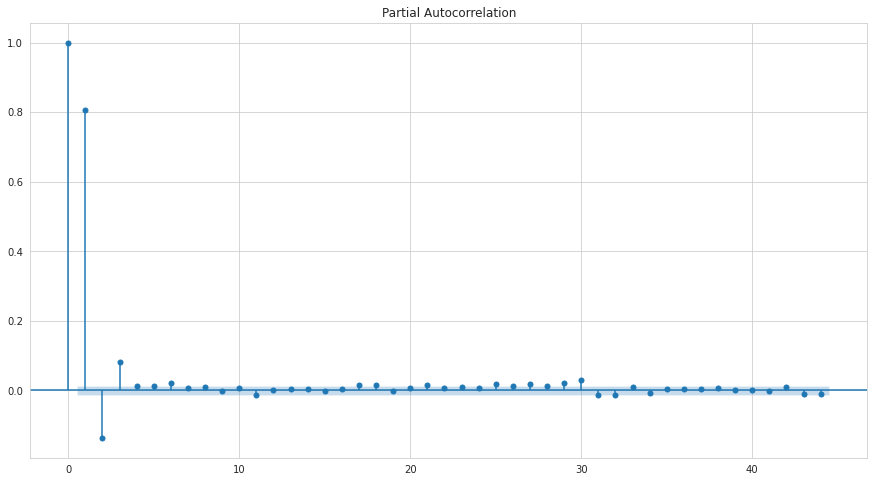

In [18]:
from statsmodels.graphics.tsaplots import plot_pacf # plot partial autocorrelation function
plot_pacf(df_train['remainder']); # 1 lag 

In [19]:
model_sm = AutoReg(df_train['remainder'], lags=1).fit()

/home/mmuratardag/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [20]:
df_train['predictions_sm'] = model_sm.predict()
#df_train.head()
#df_train.tail()

<AxesSubplot:xlabel='DATE'>

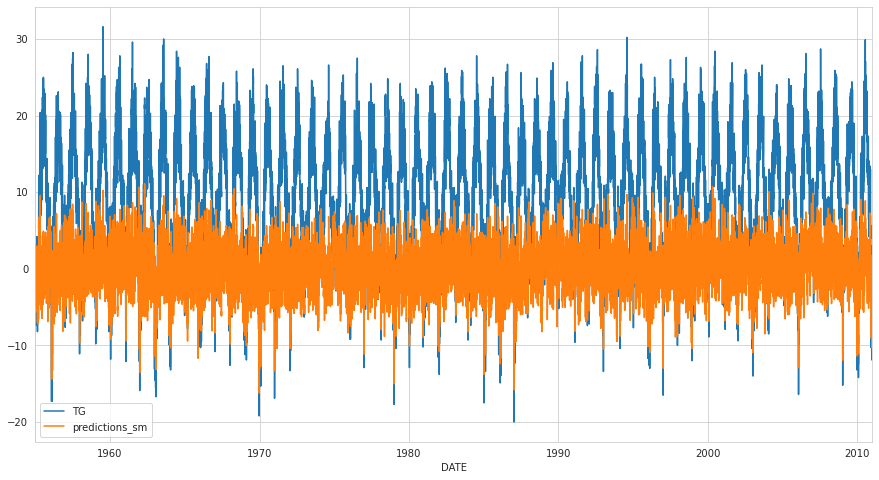

In [21]:
df_train[['TG', 'predictions_sm']].plot()